# Deep Learning with the Keras Library

**Goals:**

- Learn how to **construct** and train a keras model on both classification and regression data.

- Specifically this means, configuring model archectiture, compiling the algorithm, and fitting/predicting.

- How to implement machine learning techniques that we know but in Keras (train/test split, cross validation)

- We'll be using Keras on the front-end and TensorFlow on the backend, meaning we'll write code with Keras but the algorithms will be powered by TensorFlow.

## Keras

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_moons, make_regression

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


You should see a message that says "Using TensorFlow Backend."

If not, follow these instructions, but only after you've installed TensorFlow.

Navigate to this directory in your terminal: `~/.keras/'`

Type: `ls`

You should see the following: `datasets	keras.json`

We're going to edit the keras.json file using command line. Type: `nano keras.json`

In the dictionary, change the value for the key "backend" to "tensorflow".

Once you're finsihed, save/exit by following the instructions.

If you haven't installed Keras and TensorFlow.
- Mac: https://www.pyimagesearch.com/2016/11/14/installing-keras-with-tensorflow-backend/

- PC: https://www.lynda.com/Google-TensorFlow-tutorials/Installing-Keras-TensorFlow-backend-Windows/601801/642176-4.html

If it's not working, don't worry! Not a big deal, either find a tutorial online (stackoverflow) or ask me.

## Classification Deep Learning

We're going to use the keras library to the fake moons dataset from sklearn

In [2]:
#Generate data
X, y = make_moons(n_samples= 3000, noise = 0.12, random_state= 0)

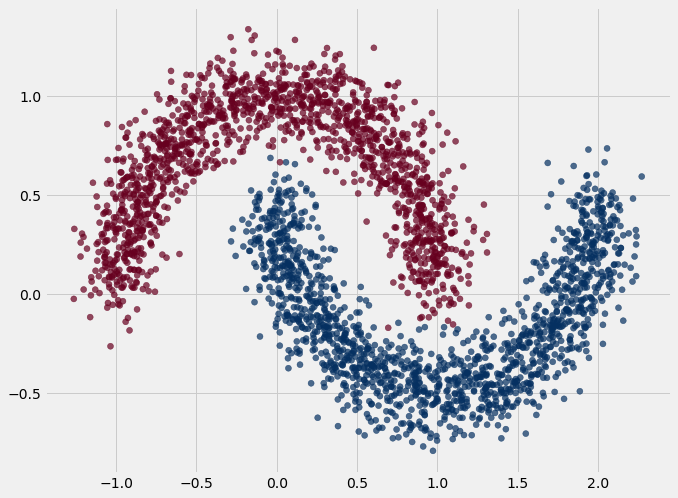

In [3]:
#Visualize data

plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], c= y, alpha = 0.7, cmap = "RdBu");

0 is red, 1 is blue

Before we make our keras model, how well would the following models work with this data: Logistic Regression, Decision Trees, and K-Nearest Neighbors

Time to design the model.

Setting up a Keras model takes more work than your a Sklearn model.

In [3]:
#Intialization with Sequential (because it's moving forwards and backwards)

model = Sequential()

Adding an input layer to our model using the Dense function

In [14]:
#Specify number of features in data
n_cols = X.shape[1]

#Adding layer with 10 units, activation function set to relu... Dense determines how many nodes
model.add(Dense(units= 10, activation = "relu", input_shape = (n_cols,)))


Add an output layer, the number of units must be equal to number of unique values in target variable, which in this case is 2. Use the sigmoid activation function

In [8]:
# Add the output layer
#Assign number of uniques to n_unique

n_unique = len(pd.unique(y))

model.add(Dense(n_unique, activation = "sigmoid"))

Here we compile the model, which means setting the optimization, loss, and metric paramaters

In [10]:
#Set optimzer to Stochastic Gradient Descent, loss to categorical_crossentropy or "log loss", metrics = accuracy
model.compile(optimizer ="sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

Before fitting, we have to binarize the target variable

In [11]:
y_binary = to_categorical(y)
y_binary

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [12]:
#Null accuracy
pd.value_counts(y, normalize= True)

1    0.5
0    0.5
dtype: float64

Fitting time! Call .fit() like you would a sklearn model.

In [14]:
model.fit(X, y_binary, epochs= 10)

Epoch 1/10
3000/3000 [==============================] - 0s 36us/step - loss: 0.6448 - acc: 0.5727
Epoch 2/10
3000/3000 [==============================] - 0s 48us/step - loss: 0.6160 - acc: 0.7633
Epoch 3/10
3000/3000 [==============================] - 0s 60us/step - loss: 0.5884 - acc: 0.8563
Epoch 4/10
3000/3000 [==============================] - 0s 45us/step - loss: 0.5612 - acc: 0.8540
Epoch 5/10
3000/3000 [==============================] - 0s 45us/step - loss: 0.5344 - acc: 0.8523
Epoch 6/10
3000/3000 [==============================] - 0s 46us/step - loss: 0.5079 - acc: 0.8523
Epoch 7/10
3000/3000 [==============================] - 0s 45us/step - loss: 0.4821 - acc: 0.8500
Epoch 8/10
3000/3000 [==============================] - 0s 49us/step - loss: 0.4571 - acc: 0.8470
Epoch 9/10
3000/3000 [==============================] - 0s 47us/step - loss: 0.4331 - acc: 0.8460
Epoch 10/10
3000/3000 [==============================] - 0s 47us/step - loss: 0.4107 - acc: 0.8470


In [ ]:
# epochs = how many times it takes to learn the model. another parameter to optimize... 
# or set a limit for diminishing returns

## **CONGRATS ON MAKING YOUR FIRST DEEP LEARNING MODEL**

[Epoch defintion](https://deeplearning4j.org/glossary): "In machine-learning parlance, an epoch is a complete pass through a given dataset. That is, by the end of one epoch, your neural network will have been exposed to every record to example within the dataset once"

<br>

Epochs are another parameter that you have to configure and can have an effect on your model's performance.

Model tells use the log loss and accuracy scores for each epoch. Do you notice any trends in these scores for each epoch?

**Visualization time.** Like we did for previous, we're going to visualize the decision boundaries of this one layer neural net model. 

In [15]:
#Load in the plot_decision_boundary function
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap="RdBu", alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y,s=40,cmap="RdBu", alpha=0.4)
    plt.xlabel("Feature One")
    plt.ylabel("Feature Two")

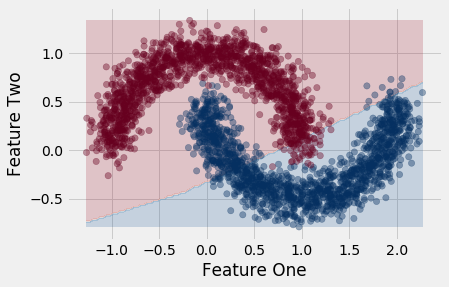

In [16]:
#Use decision boundary function model and the data
plot_decision_boundary(model, X, y)

Thoughts on the results? How good is the model?

In [ ]:
# it's an underfit model. low variance, high bias.. a little too simple, since data is more complex!!

Make prediction on point (0,0). Works same way as sklearn.

In [ ]:
# let's go back and adjust the number of layers!

In [17]:
point = np.array([[0, 0]])
model.predict(point)

array([[0.45753592, 0.36313277]], dtype=float32)

Instead of outputting a 0 or 1, it gives the probabilites of the of both unique values.

<br>

`.predict_classes()` is predicting the class not probability

In [18]:
model.predict_classes(point)

array([0])

This is a very simple model, it only has one shallow layer. Let's add some more layers.

In [20]:
#Intialize

model = Sequential()
# Add the first layer
model.add(Dense(100, activation= "relu", input_shape = (n_cols,)))

# Add the second layer or 2nd Node
model.add(Dense(100, activation = "relu"))


# Add the output layer with softmax activation function
model.add(Dense(n_unique, activation = "softmax"))

#Use adam optimizer
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [21]:
#Fit model with 30 epochs
model.fit(X, y_binary, epochs = 30)

Epoch 1/30
3000/3000 [==============================] - 1s 213us/step - loss: 0.3582 - acc: 0.8387
Epoch 2/30
3000/3000 [==============================] - ETA: 0s - loss: 0.2109 - acc: 0.897 - 0s 66us/step - loss: 0.1991 - acc: 0.9050
Epoch 3/30
3000/3000 [==============================] - 0s 68us/step - loss: 0.1084 - acc: 0.9593
Epoch 4/30
3000/3000 [==============================] - 0s 61us/step - loss: 0.0476 - acc: 0.9867
Epoch 5/30
3000/3000 [==============================] - 0s 69us/step - loss: 0.0250 - acc: 0.9943
Epoch 6/30
3000/3000 [==============================] - 0s 69us/step - loss: 0.0179 - acc: 0.9960
Epoch 7/30
3000/3000 [==============================] - 0s 73us/step - loss: 0.0131 - acc: 0.9970
Epoch 8/30
3000/3000 [==============================] - 0s 74us/step - loss: 0.0110 - acc: 0.9970
Epoch 9/30
3000/3000 [==============================] - 0s 71us/step - loss: 0.0096 - acc: 0.9977
Epoch 10/30
3000/3000 [==============================] - 0s 63us/step - loss: 0

How does the model perform now?

In [ ]:
# the model has improved drastically!

Let's *see* the difference

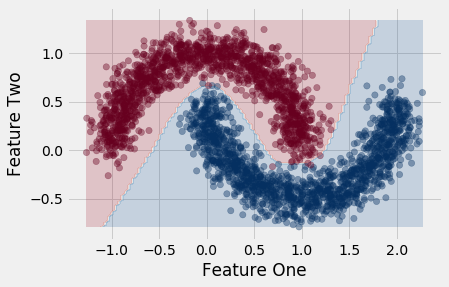

In [22]:
#Use decision boundary function model and the data
plot_decision_boundary(model, X, y)

How does that look to you? Better or worse than before? By how much?

In [ ]:
# it captures the general trend, and will do well with new data. There's a lot of confidence, and the best 
# general model

In [24]:
#Look at model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 202       
Total params: 10,602
Trainable params: 10,602
Non-trainable params: 0
_________________________________________________________________


We're trained a really good model, but principles of cross validation also to deep learning. Here's how we'll evaluate the model on a testing data.

In [ ]:
#The same code for fitting a model as we used before but this time set validation_split to 0.25


In [25]:
model.fit(X, y_binary, epochs = 30, validation_split=.25)
# the model has already been fit. You would have to re-initialize the model.. unlike scikit learn.. 
# it is called continued learning... does not reset itself when you fit it again..

Train on 2250 samples, validate on 750 samples
Epoch 1/30
2250/2250 [==============================] - 0s 72us/step - loss: 0.0061 - acc: 0.9978 - val_loss: 0.0098 - val_acc: 0.9960
Epoch 2/30
2250/2250 [==============================] - 0s 95us/step - loss: 0.0047 - acc: 0.9978 - val_loss: 0.0068 - val_acc: 0.9973
Epoch 3/30
2250/2250 [==============================] - 0s 76us/step - loss: 0.0038 - acc: 0.9991 - val_loss: 0.0096 - val_acc: 0.9973
Epoch 4/30
2250/2250 [==============================] - 0s 83us/step - loss: 0.0044 - acc: 0.9987 - val_loss: 0.0079 - val_acc: 0.9973
Epoch 5/30
2250/2250 [==============================] - 0s 79us/step - loss: 0.0044 - acc: 0.9991 - val_loss: 0.0055 - val_acc: 0.9973
Epoch 6/30
2250/2250 [==============================] - 0s 96us/step - loss: 0.0057 - acc: 0.9987 - val_loss: 0.0064 - val_acc: 0.9973
Epoch 7/30
2250/2250 [==============================] - 0s 91us/step - loss: 0.0041 - acc: 0.9991 - val_loss: 0.0043 - val_acc: 0.9973
Epoch 8/

Whats your assessment of the model now? Does it overfit?

## Regression Deep Learning

Now let's train a neural net on a regression dataset

In [26]:
#Make regression data
Xr, yr = make_regression(n_samples=1000, n_features=1, noise=7, random_state=4,bias = 0.7)

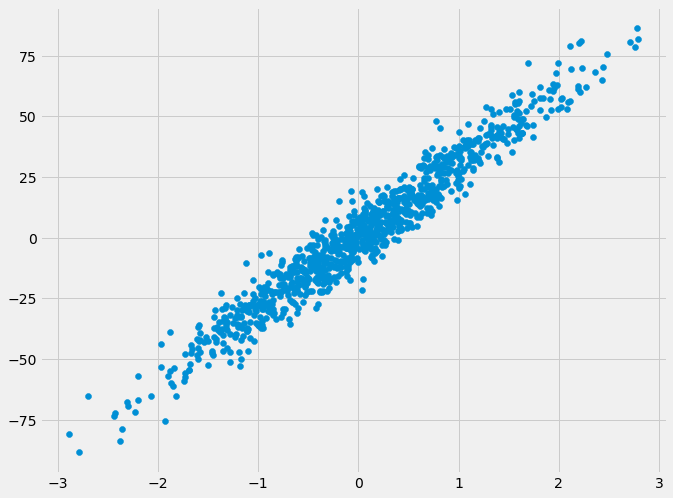

In [27]:
#Visualize
plt.figure(figsize= (10, 8))
plt.scatter(Xr, yr)

In [28]:
#Set n_cols
n_cols = Xr.shape[1]

#Intialize
model = Sequential()

# Add the first and only layer with 20 units and relu activation function
model.add(Dense(20, activation= "relu", input_shape = (n_cols,)))


# Add the output layer with one unit. In regression, the output layer only has one unit.
model.add(Dense(1))


Compiler

In [30]:
#Use adam as optimizer function and set lose to mean_squared_error... no need for log loss (less interpretable)
model.compile(optimizer= "adam", loss = "mean_squared_error")

In [31]:
#Fit model with 20 epochs
model.fit(Xr, yr, epochs= 20)

Epoch 1/20
1000/1000 [==============================] - 0s 349us/step - loss: 839.9094
Epoch 2/20
1000/1000 [==============================] - 0s 58us/step - loss: 827.9812
Epoch 3/20
1000/1000 [==============================] - 0s 61us/step - loss: 815.5174
Epoch 4/20
1000/1000 [==============================] - 0s 46us/step - loss: 802.5508
Epoch 5/20
1000/1000 [==============================] - 0s 53us/step - loss: 788.3760
Epoch 6/20
1000/1000 [==============================] - 0s 59us/step - loss: 772.8579
Epoch 7/20
1000/1000 [==============================] - 0s 58us/step - loss: 755.2924
Epoch 8/20
1000/1000 [==============================] - 0s 51us/step - loss: 735.7230
Epoch 9/20
1000/1000 [==============================] - 0s 68us/step - loss: 714.0273
Epoch 10/20
1000/1000 [==============================] - 0s 69us/step - loss: 690.7339
Epoch 11/20
1000/1000 [==============================] - 0s 50us/step - loss: 665.2720
Epoch 12/20
1000/1000 [============================

Let's try it again but with train test split

In [32]:
model.fit(Xr, yr, epochs= 20, validation_split= .25)

# basically 1/20 is number 21/40 because we're continuing where we left off in the last call!

Train on 750 samples, validate on 250 samples
Epoch 1/20
750/750 [==============================] - 0s 80us/step - loss: 367.9846 - val_loss: 383.9285
Epoch 2/20
750/750 [==============================] - 0s 45us/step - loss: 347.1429 - val_loss: 362.1425
Epoch 3/20
750/750 [==============================] - 0s 62us/step - loss: 327.2004 - val_loss: 340.4220
Epoch 4/20
750/750 [==============================] - 0s 62us/step - loss: 307.7722 - val_loss: 319.5504
Epoch 5/20
750/750 [==============================] - 0s 75us/step - loss: 288.9560 - val_loss: 299.7016
Epoch 6/20
750/750 [==============================] - 0s 86us/step - loss: 270.8993 - val_loss: 280.4597
Epoch 7/20
750/750 [==============================] - 0s 65us/step - loss: 253.6094 - val_loss: 262.2378
Epoch 8/20
750/750 [==============================] - 0s 87us/step - loss: 236.9880 - val_loss: 245.4638
Epoch 9/20
750/750 [==============================] - 0s 66us/step - loss: 221.5848 - val_loss: 228.7762
Epoch 10/

Visualize predictions

In [34]:
#Predictions

preds = model.predict(Xr)
preds[:10]

array([[ -5.341854 ],
       [  5.8571415],
       [ 10.286169 ],
       [  8.680815 ],
       [-29.870623 ],
       [ 16.337215 ],
       [  2.5444164],
       [-21.737034 ],
       [-43.460995 ],
       [-27.198511 ]], dtype=float32)

In [35]:
#Put predictions into dataframe for sorting purposes

pred_df = pd.DataFrame()
pred_df["feature"] = list(Xr)
pred_df["preds"] = list(preds)

In [36]:

#Sort dataframe

pred_df.sort_values("feature", inplace= True)

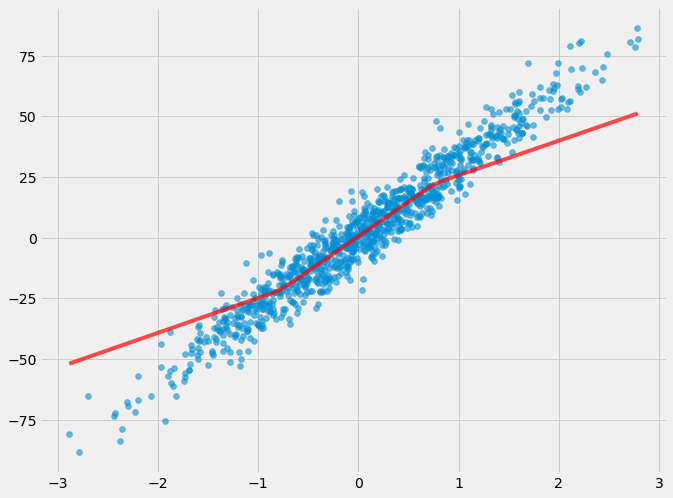

In [39]:
#Visualize
plt.figure(figsize= (10, 8))
plt.scatter(Xr, yr, alpha= .6)
plt.plot(pred_df.feature, pred_df.preds, c = 'r', alpha = 0.7);

How does that look?

In [ ]:
# it's underfit! 

**Back to the drawing board!**

We need more layers!!

In [40]:

model = Sequential()
# Add the first layer with 100 units and relu activation function
model.add(Dense(100, activation= "relu", input_shape = (n_cols,)))

# Add the second layer with 32 
model.add(Dense(32, activation= "relu"))

# Add the output layer with no activation function
model.add(Dense(1))

#Compile with adam optimizer
model.compile(optimizer= "adam", loss = "mean_squared_error")


In [41]:
#Fit model with 40 epochs
model.fit(Xr, yr, epochs = 40, validation_split=.25)

Train on 750 samples, validate on 250 samples
Epoch 1/40
750/750 [==============================] - 0s 594us/step - loss: 822.5145 - val_loss: 872.2728
Epoch 2/40
750/750 [==============================] - 0s 76us/step - loss: 790.7990 - val_loss: 830.9859
Epoch 3/40
750/750 [==============================] - 0s 93us/step - loss: 742.2811 - val_loss: 759.7711
Epoch 4/40
750/750 [==============================] - 0s 70us/step - loss: 662.9395 - val_loss: 646.6677
Epoch 5/40
750/750 [==============================] - 0s 70us/step - loss: 539.0382 - val_loss: 487.7912
Epoch 6/40
750/750 [==============================] - 0s 94us/step - loss: 384.6441 - val_loss: 309.8035
Epoch 7/40
750/750 [==============================] - 0s 88us/step - loss: 232.0743 - val_loss: 171.9636
Epoch 8/40
750/750 [==============================] - 0s 76us/step - loss: 129.6387 - val_loss: 97.5314
Epoch 9/40
750/750 [==============================] - 0s 76us/step - loss: 81.9627 - val_loss: 75.9873
Epoch 10/40

In [42]:
#Predictions

preds = model.predict(Xr)
preds

#Put predictions into dataframe for sorting purposes

pred_df = pd.DataFrame()

pred_df["feature"] = list(Xr)
pred_df["preds"] = list(preds)

#Sort dataframe

pred_df.sort_values("feature", inplace=True);

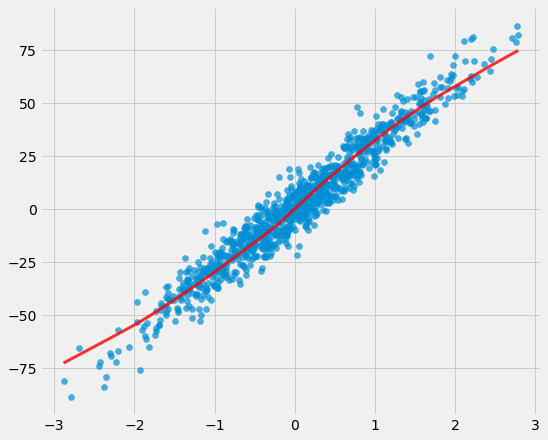

In [44]:
#Visualize

plt.figure(figsize= (8, 7))
plt.scatter(Xr, yr, alpha= .7)
plt.plot(pred_df.feature, pred_df.preds, c = "r", alpha = .8, linewidth = 3);

How does that look?

In [ ]:
# very likely as good as it gets for a regression fit. 

In [45]:
#Prediction

p = np.array([[0]])

In [46]:
#Model summary
model.predict(p)

array([[0.09064798]], dtype=float32)

Let's visualize the performance over the epochs, but first we have to reset the model.

In [47]:

model = Sequential()
# Add the first layer with 100 units and relu activation function
model.add(Dense(100, activation= "relu", input_shape = (n_cols,)))

# Add the second layer with 32 
model.add(Dense(32, activation= "relu"))

# Add the output layer with no activation function
model.add(Dense(1))

#Compile with adam optimizer
model.compile(optimizer= "adam", loss = "mean_squared_error")


In [48]:
#Re fit the model but set verbose to False and use 40 epochs and validation split to .3
#Assign model to m variable
m = model.fit(Xr, yr, epochs= 40, validation_split= .3, verbose= False)

In [49]:
#Call .history on m... you get a dict of loss based on the number of epochs
m.history

{'loss': [810.3932788085938,
  772.1966266741072,
  713.3950296456474,
  624.3173336356027,
  503.60792463030134,
  364.5007692173549,
  230.01727870396206,
  134.76894500732422,
  85.77495574951172,
  70.14712537493024,
  65.63023424421038,
  63.858058122907366,
  62.64253278459822,
  62.203454916817805,
  61.97079302106585,
  61.58814902169364,
  61.191075374058315,
  60.637401951381136,
  60.4397679574149,
  59.75365269252232,
  59.705513698032924,
  59.16863816397531,
  58.34655578613281,
  57.97222623552595,
  57.208539123535154,
  56.66557209559849,
  56.00523709978376,
  55.44262004307338,
  54.841233629499165,
  54.484603380475725,
  53.76861166817801,
  53.368381936209545,
  52.59144799368722,
  52.37377517700195,
  51.59486676897321,
  51.20917249407087,
  50.59314854213169,
  50.389247545514785,
  49.71742671421596,
  49.55987590244838],
 'val_loss': [859.1112670898438,
  808.1309659830729,
  726.3028377278646,
  608.465165201823,
  459.5292513020833,
  302.14873087565104,
 

We're going to plot the scores over the course of the epochs

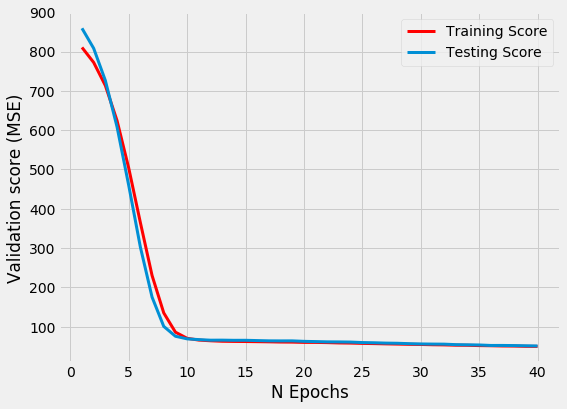

In [51]:

plt.figure(figsize= (8, 6))
epochs = range(1, 41)

plt.plot(epochs, m.history["loss"], linewidth = 3, c = "r", label = "Training Score")
plt.plot(epochs, m.history["val_loss"], linewidth = 3, label = "Testing Score")
plt.legend()
plt.xlabel("N Epochs")
plt.ylabel("Validation score (MSE)")
plt.show();

What relationship do you see here? What does this tell us about our epochs?

In [ ]:
# at around 12 Epochs is good.. 

**Answer:** We don't really need to the epochs after 15 because it produces diminishing marginal results. Basically, we're wasting our time.

We're going to solve this problem by using a tool called "EarlyStopping"

In [55]:
#Intialize early_stopper object with patience = 1 and min_delta = 1 

es = EarlyStopping(patience= 1, min_delta = 1)

Patience value indicates how many epochs of no improvement until the algorithms stops fitting.

Min_delta value is the model improvement threshold it must meet in order to keep going.

Restart the model from the beginning.

In [53]:
#Intialize
model = Sequential()

# Add the first layer with 50 units and relu activation function
model.add(Dense(100, activation= "relu", input_shape = (n_cols,)))

# Add the second layer with 32 
model.add(Dense(100, activation= "relu"))

# Add the output layer with no activation function
model.add(Dense(1))

#Compile with adam
model.compile(optimizer= "adam", loss = "mean_squared_error")


In [56]:
#Fit model on regresion data, use 40 epochs, validation split of .3
#Set callbacks equal to [es]
model.fit(Xr, yr, epochs = 40, validation_split= 0.2, callbacks= [es])

Train on 800 samples, validate on 200 samples
Epoch 1/40
800/800 [==============================] - 1s 712us/step - loss: 831.1420 - val_loss: 781.2944
Epoch 2/40
800/800 [==============================] - 0s 64us/step - loss: 759.5933 - val_loss: 686.1359
Epoch 3/40
800/800 [==============================] - 0s 53us/step - loss: 626.6105 - val_loss: 523.4057
Epoch 4/40
800/800 [==============================] - 0s 65us/step - loss: 429.5126 - val_loss: 304.8692
Epoch 5/40
800/800 [==============================] - 0s 89us/step - loss: 215.2361 - val_loss: 138.9840
Epoch 6/40
800/800 [==============================] - 0s 90us/step - loss: 96.6302 - val_loss: 78.5583
Epoch 7/40
800/800 [==============================] - 0s 56us/step - loss: 67.2769 - val_loss: 69.8835
Epoch 8/40
800/800 [==============================] - 0s 82us/step - loss: 63.1573 - val_loss: 70.3265


In [ ]:
#It stops at 8 epochs! 

## Bonus

http://playground.tensorflow.org/

# Resources


`pip install dlmaterials`

`from dlmaterials import Resources`

`resource = Resources()`

`resource.download()`

In [104]:
def keras_reg(model):
    #Intialize
    model = Sequential()

    # Add the first layer with 50 units and relu activation function
    model.add(Dense(50, activation= "relu", input_shape = (n_cols,)))

    # Add the second layer with 32 
    model.add(Dense(50, activation= "relu"))

    # Add the output layer with no activation function
    model.add(Dense(1))
    return model


# Class Lab Time

1. Make a function that returns a pre-initialized with a two layer Keras model. The choice of parameters are up to you.

2. Pick a supervised learning dataset (regression or classification) and use Keras to model that data. Compare results of the keras model to that of a logistic regression model. You're also more than welcome to use keras on your final project data as well.


In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [39]:
#Load the datafile "Spotify_Data.pkl" and check it out
df = pd.read_pickle("../data/Spotify_Data.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, Mask_Off***Future to I_Wanna_Get_Better***Bleachers
Data columns (total 9 columns):
acousticness        2017 non-null float64
mode                2017 non-null int64
tempo               2017 non-null float64
loudness            2017 non-null float64
danceability        2017 non-null float64
instrumentalness    2017 non-null float64
valence             2017 non-null float64
energy              2017 non-null float64
target              2017 non-null int64
dtypes: float64(7), int64(2)
memory usage: 157.6+ KB


In [87]:
def keras_clf(model):
    #Intialize
    model = Sequential()
    # Add the first layer
    model.add(Dense(100, activation= "relu", input_shape = (n_cols,)))
    # Add the second layer or 2nd Node
    model.add(Dense(100, activation = "relu"))
    # Add the output layer with softmax activation function
    model.add(Dense(n_unique, activation = "softmax"))
    #Use adam optimizer
    model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
    return model

In [40]:
X = df.drop("target", axis= 1)
y = df.target

scale = StandardScaler()

X_s = scale.fit_transform(X)

# number of columns will be 8 for the number of features
n_cols = X_s.shape[1]

y_binary = to_categorical(y)

n_unique = len(pd.unique(y))

es = EarlyStopping(patience= 1, min_delta = 1)

In [41]:
#Intialize
model = Sequential()
# Add the first layer
model.add(Dense(300, activation= "relu", input_shape = (n_cols,)))
# Add the second layer or 2nd Node
model.add(Dense(300, activation = "relu"))    
# Add the third layer 
model.add(Dense(300, activation = "relu"))  
# 4th
model.add(Dense(200, activation = "relu"))  
# 5th
model.add(Dense(100, activation = "relu")) 
# 6th
model.add(Dense(100, activation = "relu")) 
# 7th
model.add(Dense(50, activation = "relu"))
# 8th
model.add(Dense(1, activation = "relu"))

# Add the output layer with softmax activation function
model.add(Dense(n_unique, activation = "sigmoid"))
#Use adam optimizer, and categorical_crossentropy which is "log loss"
model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [42]:
m = model.fit(X_s, y_binary, epochs = 100, validation_split= .33, verbose= False)

In [166]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_67 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_68 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_69 (Dense)             (None, 2)                 202       
Total params: 21,302
Trainable params: 21,302
Non-trainable params: 0
_________________________________________________________________


In [207]:
m.history

{'acc': [0.7290895633746923, 0.7549962990818687],
 'loss': [0.6630817987493548, 0.621032807449338],
 'val_acc': [0.0, 0.0],
 'val_loss': [0.8213613665139711, 0.9397743961832545]}

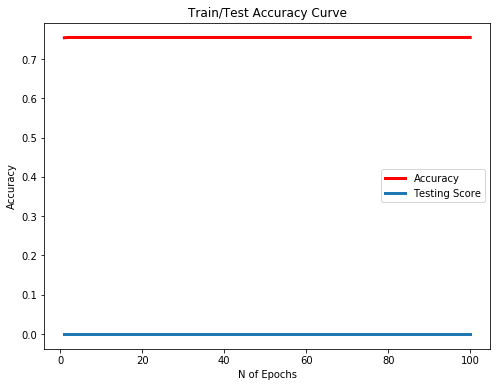

In [43]:
plt.figure(figsize= (8, 6))
epochs = range(1, 101)

plt.plot(epochs, m.history["acc"], linewidth = 3, c = "r", label = "Accuracy")
plt.plot(epochs, m.history["val_acc"], linewidth = 3, label = "Testing Score")
plt.legend(loc= 'best')
plt.xlabel("N of Epochs")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy Curve")
plt.show();

# Lending Club Deep Learning attempt.... 

In [2]:
# Read in data:

df = pd.read_csv("/Users/Darrenklee/Desktop/DS-Project/LoanStats3d.csv")

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#pass in new subset of features

good_feat = ["num_tl_120dpd_2m",
"mo_sin_old_il_acct",
"percent_bc_gt_75",
"bc_util",
"bc_open_to_buy",
"dti",
"num_rev_accts",
"delinq_2yrs",
"inq_last_6mths",
"revol_bal",
"open_acc",
"pub_rec",
"total_acc",
"num_bc_tl",
"funded_amnt",
"int_rate",
"installment",
"home_ownership",
"annual_inc",
"total_rec_int",
"chargeoff_within_12_mths",
"num_sats",
"num_rev_tl_bal_gt_0",
"total_rev_hi_lim",
"num_op_rev_tl",
"num_il_tl",
"acc_open_past_24mths",
"avg_cur_bal",
"delinq_amnt",
"num_tl_90g_dpd_24m",
"mo_sin_old_rev_tl_op",
"mo_sin_rcnt_rev_tl_op",
"mo_sin_rcnt_tl",
"mort_acc",
"num_accts_ever_120_pd",
"num_actv_bc_tl",
"num_actv_rev_tl",
"num_tl_30dpd",
"num_tl_op_past_12m",
"total_il_high_credit_limit",
"num_bc_sats",
"collections_12_mths_ex_med",
"policy_code",
"total_bc_limit",
"pct_tl_nvr_dlq",
"total_bal_ex_mort",
"acc_now_delinq",
"tot_coll_amt",
"tot_cur_bal",
"tot_hi_cred_lim",
"tax_liens",
"pub_rec_bankruptcies",
"loan_amnt",
"total_pymnt",            
"revol_util",
"term",
"purpose",
"emp_length",
'loan_status',
'application_type',
'grade',
"emp_title"]



#manually removed:
#"recoveries", , "hardship_flag", "title", "total_rec_late_fee",
#"funded_amnt_inv", "issue_d", "verification_status", "grade", "sub_grade", "initial_list_status",
#"pymnt_plan", "debt_settlement_flag", "addr_state", "earliest_cr_line",
#"mths_since_recent_bc", "total_rec_prncp", "total_pymnt_inv", "out_prncp_inv",
#'last_pymnt_amnt','collection_recovery_fee','total_pymnt', "out_prncp", "last_credit_pull_d"

#drop:
#'sub_grade', 'verification_status', 'issue_d', 'pymnt_plan',  'title','zip_code','addr_state',
# 'earliest_cr_line',  'initial_list_status',  'last_pymnt_d', 'next_pymnt_d', 'desc',
#'verification_status_joint', 'hardship_flag','hardship_type','hardship_reason','hardship_status','
#hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_loan_status',
#'disbursement_method','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date'

#categorical(included in [good_feat]): will transform to dummies in df_fe function.
#"last_pymnt_d",
#'term','emp_length','home_ownership',
#'purpose', 'application_type'

# save for NLP if possible: 
# "emp_title"

In [4]:
#Create a function that will take unclean data, and apply feature engineering techniques

df = pd.read_csv("/Users/Darrenklee/Desktop/DS-Project/LoanStats3d.csv")
#good_feat eliminates all null columns
df = df[good_feat]
#we only want to focus on "Fully Paid" and "Charged Off" loans as target
df = df[df.loan_status != "Current"]
df = df[df.loan_status != "Late (31-120 days)"]
df = df[df.loan_status != "In Grace Period"]
df = df[df.loan_status != "Late (16-30 days)"]
df = df[df.loan_status != "Default"]
df = df[df.application_type != "Joint App"]
#0 for Fully Paid loans, and 1 for Charged Off loans
target_dict = {"Fully Paid":0, "Charged Off":1}
df["loan_status"] = df.loan_status.map(target_dict)


def df_fe(df):
    df.dropna(inplace= True)
    df.drop("application_type", axis=1, inplace =True)
    df["int_rate"] = df.int_rate.str.replace("%", "")  
    df["int_rate"] = df.int_rate.astype(float)
    df["revol_util"] = df.revol_util.str.replace("%", "")  
    df["revol_util"] = df.revol_util.astype(float)
    #create dummy variables for categorical data
    df_purpose_dums = pd.get_dummies(df.purpose, prefix = "purpose", drop_first=True)
    df = pd.concat([df, df_purpose_dums], axis = 1)
    df.drop("purpose", axis = 1, inplace=True)
    df_term_dums = pd.get_dummies(df.term, prefix = "term", drop_first = True)
    df = pd.concat([df, df_term_dums], axis = 1)
    df.drop("term", axis = 1, inplace=True)
    df_emp_length_dums = pd.get_dummies(df.emp_length, prefix = "emp_length", drop_first = True)
    df = pd.concat([df, df_emp_length_dums], axis = 1)
    df.drop("emp_length", axis = 1, inplace=True)
    df_ownership_dums = pd.get_dummies(df.home_ownership, prefix = "ownership", drop_first = True)
    df = pd.concat([df, df_ownership_dums], axis = 1)
    df.drop("home_ownership", axis = 1, inplace=True)
    df.columns = df.columns.str.lower()
    #df.columns = df.columns.str.replace(" ", "_")
    #df.columns = df.columns.str.replace("-", "_")
    #df.columns = df.columns.str.replace("__", "_")
    #fico has high and low range columns, take average!
    #df["fico_average"] = df[["fico_high_range", "fico_low_range"]].mean(axis=1)
    return df

In [5]:
lcdf = df_fe(df)

In [6]:
grade_classes = lcdf.grade
lcdf.drop(["grade", "emp_title"], axis = 1, inplace= True)

In [7]:
lcdf.shape

(183660, 82)

In [32]:
X = lcdf.drop("loan_status", axis= 1)
y = lcdf.loan_status

#scale = StandardScaler()
#X_s = scale.fit_transform(X)

# number of columns will be 8 for the number of features
n_cols = X.shape[1]

y_binary = to_categorical(y)

n_unique = len(pd.unique(y))

es = EarlyStopping(patience= 1, min_delta = 1)

In [20]:
def create_model():
    #Intialize
    model = Sequential()
    # Add the first layer
    model.add(Dense(100, activation= "relu", input_shape = (n_cols,)))
    # Add the second layer or 2nd Node
    model.add(Dense(100, activation = "relu"))    
    # Add the third layer 
    model.add(Dense(100, activation = "relu"))  
    # 4th
    model.add(Dense(300, activation = "relu"))  
    # 5th
    model.add(Dense(300, activation = "relu")) 
    # Add the output layer with softmax activation function
    model.add(Dense(n_unique, activation = "sigmoid"))
    #Use adam optimizer, and categorical_crossentropy which is "log loss"
    model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])
    return model

In [33]:
#Intialize
model = Sequential()
# Add the first layer
model.add(Dense(100, activation= "relu", input_shape = (n_cols,)))
# Add the second layer or 2nd Node
model.add(Dense(100, activation = "relu"))    
# Add the third layer 
model.add(Dense(300, activation = "relu"))  
# 4th
model.add(Dense(200, activation = "relu"))  
# 5th
model.add(Dense(100, activation = "relu")) 
# 6th
model.add(Dense(100, activation = "relu")) 
# 7th
model.add(Dense(50, activation = "relu"))
# 8th
model.add(Dense(1, activation = "relu"))

# Add the output layer with softmax activation function
model.add(Dense(n_unique, activation = "sigmoid"))
#Use adam optimizer, and categorical_crossentropy which is "log loss"
model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [34]:
m = model.fit(X, y_binary, epochs = 50, validation_split= .33, verbose= False)

In [22]:
m.history

{'acc': [0.7421415336586287,
  0.7422878132841272,
  0.7422878132802521,
  0.7422878132802521,
  0.7422878132821896,
  0.7422878132821896,
  0.7422878132841272,
  0.7422878132821896,
  0.7422878132802521,
  0.7422878132841272],
 'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'val_acc': [0.7473765839493136,
  0.7473765839493136,
  0.7473765839493136,
  0.7473765839493136,
  0.7473765839493136,
  0.7473765839493136,
  0.7473765839493136,
  0.7473765839493136,
  0.7473765839493136,
  0.7473765839493136],
 'val_loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]}

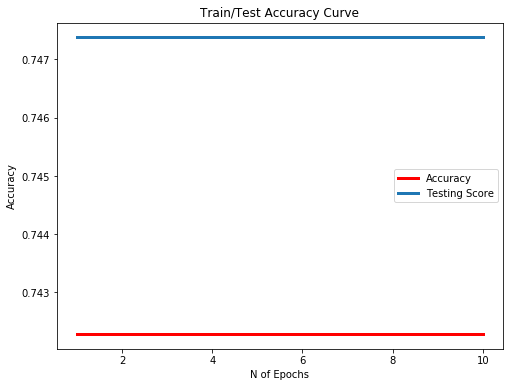

In [31]:
plt.figure(figsize= (8, 6))
epochs = range(1, 11)

plt.plot(epochs, m.history["acc"], linewidth = 3, c = "r", label = "Accuracy")
plt.plot(epochs, m.history["val_acc"], linewidth = 3, label = "Testing Score")
plt.legend(loc= 'best')
plt.xlabel("N of Epochs")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy Curve")
plt.show();